In [ ]:
! pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:

# For demonstration, we’ll use the CIFAR-10 dataset to represent our categories.
# We will pretend 'defective' is class 0 and 'non-defective' is class 1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Filter only classes 0 and 1 (as an example to represent defective and non-defective)
class_0, class_1 = 0, 1  # Specify classes to simulate defective and non-defective
train_filter = (y_train == class_0) | (y_train == class_1)
test_filter = (y_test == class_0) | (y_test == class_1)


In [ ]:
x_train, y_train = x_train[train_filter.flatten()], y_train[train_filter.flatten()]
x_test, y_test = x_test[test_filter.flatten()], y_test[test_filter.flatten()]


In [ ]:
# Convert labels to binary: class_0 -> 0 (defective), class_1 -> 1 (non-defective)
y_train = np.where(y_train == class_0, 0, 1)
y_test = np.where(y_test == class_0, 0, 1)

In [ ]:
# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Data Augmentation for training to reduce overfitting
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=16)


In [ ]:
# Load pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model layers

<ipython-input-36-34ff7eecabf9>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build model on top of the base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.5683 - loss: 0.6770 - val_accuracy: 0.6195 - val_loss: 0.6368
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6535 - loss: 0.6254 - val_accuracy: 0.6605 - val_loss: 0.5953
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6634 - loss: 0.5982 - val_accuracy: 0.6665 - val_loss: 0.5784
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.6782 - loss: 0.5788 - val_accuracy: 0.6765 - val_loss: 0.5662
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.6915 - loss: 0.5709 - val_accuracy: 0.6840 - val_loss: 0.5614
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7087 - loss: 0.5534 - val_accuracy: 0.6935 - val_loss: 0.5563
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.7030 - loss: 0.5622 - val_accuracy: 0.7425 - val_loss: 0.5543
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7154 - loss: 0.5571 - 

In [ ]:
# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype("int32").flatten()
print("Accuracy: ", np.mean(y_pred == y_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
Accuracy:  0.5


In [ ]:
# Print classification metrics
print(classification_report(y_test, y_pred, target_names=['Defective', 'Non-defective']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

               precision    recall  f1-score   support

    Defective       0.82      0.67      0.73      1000
Non-defective       0.72      0.85      0.78      1000

     accuracy                           0.76      2000
    macro avg       0.77      0.76      0.76      2000
 weighted avg       0.77      0.76      0.76      2000

Confusion Matrix:
 [[665 335]
 [148 852]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Raw prediction: [[0.99982285]]
Prediction: Non-defective


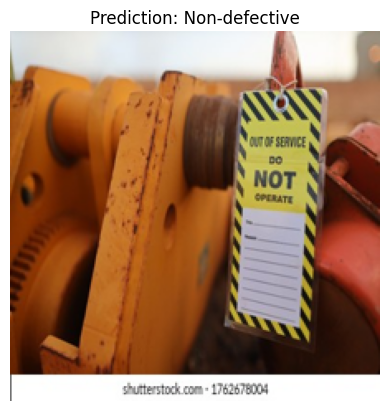

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Predict on uploaded image (provide the image URL here)
image_url = 'https://www.shutterstock.com/image-photo/safety-workplaces-yellow-out-service-260nw-1762678004.jpg'

# Download the image using requests
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Resize the image to match the model input size (use the model's expected input size)
# Assuming the model expects (224, 224) as input size
img_resized = img.resize((224, 224))  # Adjust this based on your model's input size

# Convert the image to a numpy array
img_array = img_to_array(img_resized)

# Expand dimensions to match the model input shape (adding batch dimension)
img_array_expanded = np.expand_dims(img_array, axis=0)

# Normalize the image (scaled to 0-1)
img_array_normalized = img_array_expanded / 255.0


# model = tf.keras.models.load_model('path_to_your_model.h5')  # Load your trained model here

# Predict whether the image is defective or non-defective
prediction = model.predict(img_array_normalized)

# Debug: Print the raw prediction output
print("Raw prediction:", prediction)

# Apply a threshold based on the model's output
# For binary classification with a sigmoid activation, typically use 0.5 as the threshold
if prediction > 0.5:
    result = "Non-defective"
else:
    result = "Defective"

# Output the result
print(f"Prediction: {result}")

# Display the image with the prediction
plt.imshow(img_resized)
plt.title(f"Prediction: {result}")
plt.axis('off')  # Hide axis for a cleaner look
plt.show()
